In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from apyori import apriori

In [139]:
alarm = pd.read_excel ('C:\\Users\\abhishekshenoy\\Downloads\\Alarms file for EDA phase 2020 (1).xlsx')

In [140]:
df = pd.DataFrame(alarm)

In [141]:
df.rename(columns = {'Timestamp':'timestamp','Requestor':'requestor','Role':'role','Component Accessed':'component_accessed','Request type':'request_type','Violation type':'violation_type','Alarm':'alarm'}, inplace = True)

# Creating two seperate data sets with only true and only false alarm entries for later use

In [142]:
dftrue = df.drop(df[df['alarm'] == False ].index)

In [143]:
dffalse = df.drop(df[df['alarm'] == True ].index)

In [144]:
dftrue.head(10)

,timestamp,requestor,role,component_accessed,request_type,violation_type,alarm
4,2016-08-10 07:12:00,User A,Analyst,Element 2,Select,No authorization,True
5,2016-08-10 07:27:00,User A,Analyst,Element 2,Select,No authorization,True
6,2016-08-10 07:41:00,User A,Analyst,Element 2,Select,No authorization,True
7,2016-08-10 07:55:00,User A,Analyst,Element 3,Append,No authorization,True
25,2016-08-10 11:46:00,User B,Business user,Element 1,Select,No authorization,True
27,2016-08-10 12:15:00,User B,Business user,Element 1,Select,No authorization,True
38,2016-08-10 14:53:00,User B,Business user,Element 1,Select,No authorization,True
40,2016-08-10 15:22:00,User B,Business user,Element 1,Select,No authorization,True
53,2016-08-10 18:29:00,User B,Business user,Element 1,Select,No authorization,True
92,2016-08-11 03:51:00,User B,Business user,Element 1,Select,No authorization,True


In [145]:
dftrue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 4 to 1192
Data columns (total 7 columns):
timestamp             140 non-null datetime64[ns]
requestor             140 non-null object
role                  140 non-null object
component_accessed    140 non-null object
request_type          140 non-null object
violation_type        140 non-null object
alarm                 140 non-null bool
dtypes: bool(1), datetime64[ns](1), object(5)
memory usage: 7.8+ KB


In [146]:
dffalse.head(10)

,timestamp,requestor,role,component_accessed,request_type,violation_type,alarm
0,2016-08-10 06:15:00,User B,Business user,Table 2,Select,No authorization,False
1,2016-08-10 06:29:00,User B,Business user,Table 2,Select,No authorization,False
2,2016-08-10 06:43:00,User B,Business user,Table 2,Select,No authorization,False
3,2016-08-10 06:58:00,User C,Administrator,Element 1,Select,No authorization,False
8,2016-08-10 08:10:00,User A,Analyst,Element 1,Select,No authorization,False
9,2016-08-10 08:24:00,User B,Business user,Table 2,Select,No authorization,False
10,2016-08-10 08:39:00,User B,Business user,Table 2,Select,No authorization,False
11,2016-08-10 08:53:00,User B,Business user,Table 2,Select,No authorization,False
12,2016-08-10 09:07:00,User C,Administrator,Element 1,Select,No authorization,False
13,2016-08-10 09:22:00,User C,Administrator,Element 1,Select,No authorization,False


In [147]:
dffalse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1053 entries, 0 to 1189
Data columns (total 7 columns):
timestamp             1053 non-null datetime64[ns]
requestor             1053 non-null object
role                  1053 non-null object
component_accessed    1053 non-null object
request_type          1053 non-null object
violation_type        1053 non-null object
alarm                 1053 non-null bool
dtypes: bool(1), datetime64[ns](1), object(5)
memory usage: 58.6+ KB


# Using original data set with both true and false alarms

In [148]:
df.head()

,timestamp,requestor,role,component_accessed,request_type,violation_type,alarm
0,2016-08-10 06:15:00,User B,Business user,Table 2,Select,No authorization,False
1,2016-08-10 06:29:00,User B,Business user,Table 2,Select,No authorization,False
2,2016-08-10 06:43:00,User B,Business user,Table 2,Select,No authorization,False
3,2016-08-10 06:58:00,User C,Administrator,Element 1,Select,No authorization,False
4,2016-08-10 07:12:00,User A,Analyst,Element 2,Select,No authorization,True


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 7 columns):
timestamp             1193 non-null datetime64[ns]
requestor             1193 non-null object
role                  1193 non-null object
component_accessed    1193 non-null object
request_type          1193 non-null object
violation_type        1193 non-null object
alarm                 1193 non-null bool
dtypes: bool(1), datetime64[ns](1), object(5)
memory usage: 57.2+ KB


In [150]:
df.describe()

,timestamp,requestor,role,component_accessed,request_type,violation_type,alarm
count,1193,1193,1193,1193,1193,1193,1193
unique,1118,3,3,5,2,1,2
top,2016-08-19 11:17:00,User A,Analyst,Table 1,Select,No authorization,False
freq,3,690,690,680,1053,1193,1053
first,2016-08-10 06:15:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2016-08-21 10:19:00,NaN,NaN,NaN,NaN,NaN,NaN


# Analyzing by the column 'role'

# Grouping by alarm

In [151]:
byalarm = df.groupby('alarm').role.value_counts(normalize=False)
byalarm.unstack()

role,Administrator,Analyst,Business user
alarm,,,
False,150.0,650.0,253.0
True,NaN,40.0,100.0


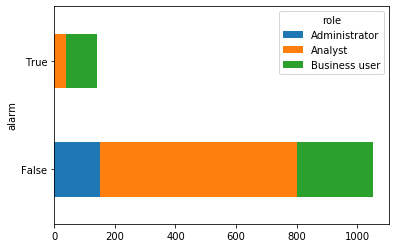

In [152]:
byalarm.unstack().plot(kind='barh', stacked=True)

In [153]:
#normalizing the data

In [154]:
byalarm = df.groupby('alarm').role.value_counts(normalize=True)
byalarm.unstack()

role,Administrator,Analyst,Business user
alarm,,,
False,0.14245,0.617284,0.240266
True,NaN,0.285714,0.714286


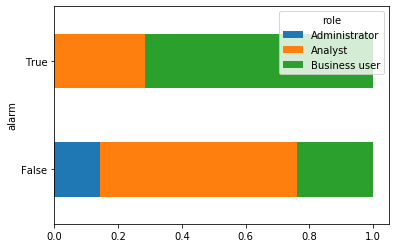

In [155]:
byalarm.unstack().plot(kind='barh', stacked=True)

We can see that the administrator has not triggered a True alarm. This may indicate that different users have access to
different components and accessing a component that is isnt auhtorized by the user results in a True alarm

# Grouping by component

In [156]:
bycomp = df.groupby('component_accessed').role.value_counts(normalize = False)
bycomp.unstack()

role,Administrator,Analyst,Business user
component_accessed,,,
Element 1,120.0,10.0,60.0
Element 2,20.0,30.0,NaN
Element 3,10.0,10.0,NaN
Table 1,NaN,640.0,40.0
Table 2,NaN,NaN,253.0


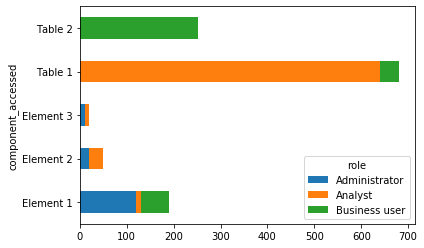

In [157]:
bycomp.unstack().plot(kind='barh',stacked = True)

In [158]:
#Normalizing the data 

In [159]:
bycomp = df.groupby('component_accessed').role.value_counts(normalize = True)
bycomp.unstack()

role,Administrator,Analyst,Business user
component_accessed,,,
Element 1,0.631579,0.052632,0.315789
Element 2,0.400000,0.600000,NaN
Element 3,0.500000,0.500000,NaN
Table 1,NaN,0.941176,0.058824
Table 2,NaN,NaN,1.000000


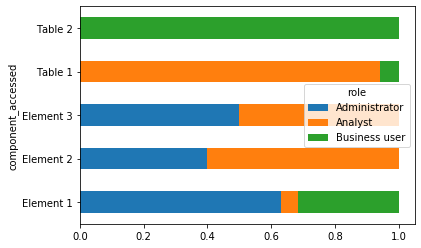

In [160]:
bycomp.unstack().plot(kind='barh',stacked = True)

the above chart shows the components accessed by each individual user.

We know that administrator did not give a True alarm. So from the above bar chart it is safe to assume that administrator 
has access to the elements 1,2 and, 3.

# Using the dataset that contains the false alarms only. we can further find out if the administrator has access to tables 1 and 2

In [161]:
bycomp_false = dffalse.groupby('component_accessed').role.value_counts(normalize=False)
bycomp_false.unstack()

role,Administrator,Analyst,Business user
component_accessed,,,
Element 1,120.0,10.0,NaN
Element 2,20.0,NaN,NaN
Element 3,10.0,NaN,NaN
Table 1,NaN,640.0,NaN
Table 2,NaN,NaN,253.0


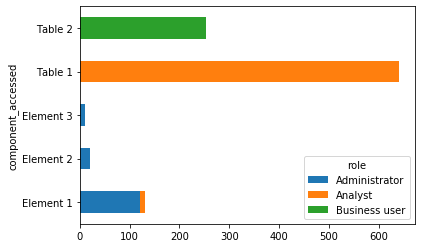

In [162]:
bycomp_false.unstack().plot(kind='barh',stacked = True)

In [163]:
#normalizing the data

In [27]:
bycomp_false = dffalse.groupby('component_accessed').role.value_counts(normalize=True)
bycomp_false.unstack()

role,Administrator,Analyst,Business user
component_accessed,,,
Element 1,0.923077,0.076923,NaN
Element 2,1.000000,NaN,NaN
Element 3,1.000000,NaN,NaN
Table 1,NaN,1.000000,NaN
Table 2,NaN,NaN,1.0


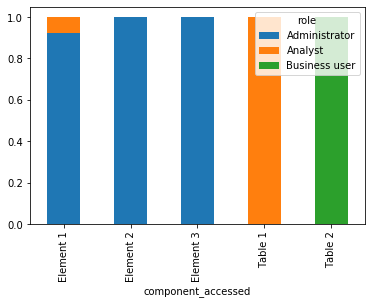

In [28]:
bycomp_false.unstack().plot(kind='bar',stacked = True)

from the above graph. by removing the rows that have a true alarm, we can narrow down what a specific user has access to.
it is seen that :-
    
business user has access to table 2

analyst has access to table 1 and element 1

administrator has access to elements 1,2 and, 3

# Now using the only true alarms we can narrow down what a user does not have access to.

In [29]:
bycomp_true = dftrue.groupby('component_accessed').role.value_counts(normalize=False)
bycomp_true.unstack()

role,Analyst,Business user
component_accessed,,
Element 1,NaN,60.0
Element 2,30.0,NaN
Element 3,10.0,NaN
Table 1,NaN,40.0


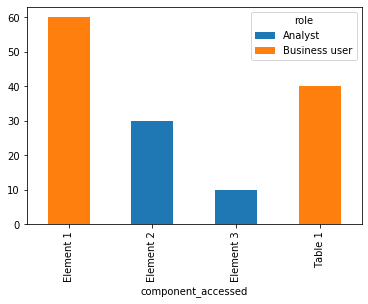

In [30]:
bycomp_true.unstack().plot(kind='bar', stacked = True)

It is seen from the above graph that the alarm is triggered by the :
    
analyst accessing element 2 and 3 

business user accessing element 1 and table 1

# By tabulating what we have found so far from the charts above

Can access :-

Analyst can access - table 1 and element 1

business user can access - table 2 

administrator can access - element 1, element 2 and, element 3

cannot access :-
    
analyst cannot access - element 2 and element 3

business user cannot access - element 1 and table 1

# To find out whether administrator can access all the components we need to analyze the administrator alone

In [31]:
byadmin = df.groupby('role') 

#df - both true and false
#dftrue - only t


In [32]:
byadmin = byadmin.get_group('Administrator').component_accessed.value_counts()

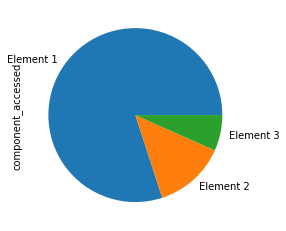

In [33]:
byadmin.plot(kind='pie',stacked = True)

it is seen that from the given data that, administrator accesses only elements 1, 2, and 3
and nothing more

# Now we check if the business user is accessing any other table

In [34]:
bybusinessuser = df.groupby('role')

In [35]:
bybusinessuser = bybusinessuser.get_group('Business user').component_accessed.value_counts()

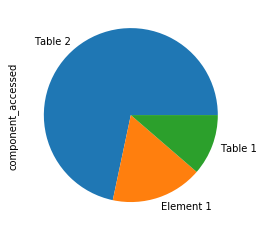

In [36]:
bybusinessuser.plot(kind = 'pie')

it is seen that from the given data that, business users accesses only elements 1, table 1 and 2
and nothing more

# It is inconclusive if administrator can access tables 1 and 2

# We also cannot determine if the business user can acess element 2 and 3 from the given data

# Analyzing the columns 'Request type'

# grouping by Alarm

In [37]:
byalarm = df.groupby('request_type').alarm.value_counts(normalize=False)
byalarm.unstack()

alarm,False,True
request_type,,
Append,130,10
Select,923,130


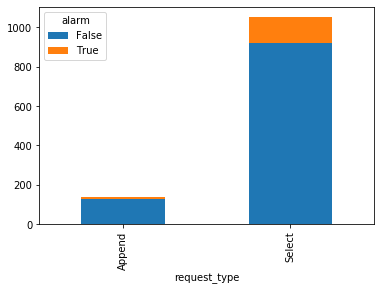

In [38]:
byalarm.unstack().plot(kind='bar', stacked = True)

In [39]:
#normalizing the data

In [40]:
byalarm = df.groupby('request_type').alarm.value_counts(normalize=True)
byalarm.unstack()

alarm,False,True
request_type,,
Append,0.928571,0.071429
Select,0.876543,0.123457


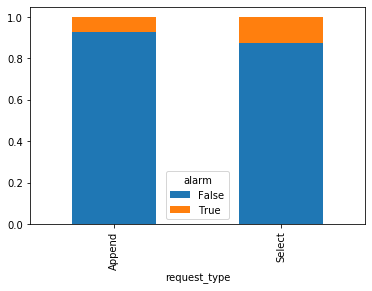

In [41]:
byalarm.unstack().plot(kind='bar',stacked = True)

we can see that there are are a lot more False alarms, so by analyzing the True values alone we can determine 
if the true values are 

# using the only false data set

# comparing request type with the role

In [42]:
byrequest = dffalse.groupby('request_type').role.value_counts(normalize=False)
byrequest.unstack()

role,Administrator,Analyst,Business user
request_type,,,
Append,NaN,130.0,NaN
Select,150.0,520.0,253.0


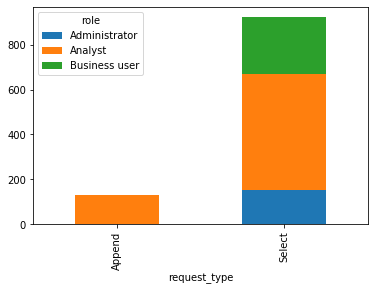

In [43]:
byrequest.unstack().plot(kind = 'bar', stacked = True)

In [44]:
#normalizing the data

In [45]:
byrequest = dffalse.groupby('request_type').role.value_counts(normalize=True)
byrequest.unstack()

role,Administrator,Analyst,Business user
request_type,,,
Append,NaN,1.00000,NaN
Select,0.162514,0.56338,0.274106


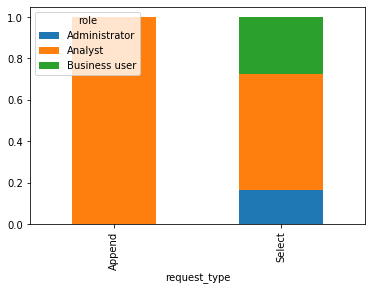

In [46]:
byrequest.unstack().plot(kind = 'bar', stacked = True)

# Using the only true and grouping by each individual users

In [47]:
byuser_A = dftrue.groupby('role')

In [48]:
byuser_A = byuser_A.get_group('Analyst').request_type.value_counts()

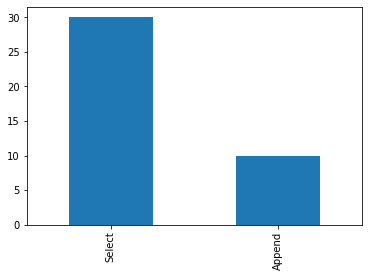

In [49]:
byuser_A.plot(kind = 'bar')

In [50]:
byuser_A

Select    30
Append    10
Name: request_type, dtype: int64

In [51]:
byuser_B = dftrue.groupby('role')

In [52]:
byuser_B = byuser_B.get_group('Business user').request_type.value_counts()

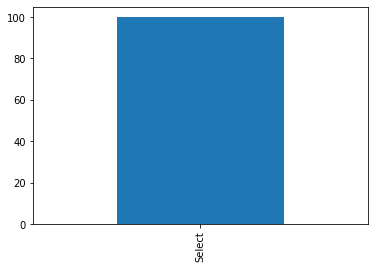

In [53]:
byuser_B.plot(kind = 'bar')

In [54]:
byuser_B

Select    100
Name: request_type, dtype: int64

In [55]:
byuser_C = dftrue.groupby('role')

In [56]:
#byuser_C = byuser_C.get_group('Administrator').request_type.value_counts()

In [57]:
#byuser_C.plot(kind = 'bar')

It is seen that the request type does not have an effect on the target variable.

# Analyzing 'violation type'

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 7 columns):
timestamp             1193 non-null datetime64[ns]
requestor             1193 non-null object
role                  1193 non-null object
component_accessed    1193 non-null object
request_type          1193 non-null object
violation_type        1193 non-null object
alarm                 1193 non-null bool
dtypes: bool(1), datetime64[ns](1), object(5)
memory usage: 57.2+ KB


In [59]:
df.describe()

,timestamp,requestor,role,component_accessed,request_type,violation_type,alarm
count,1193,1193,1193,1193,1193,1193,1193
unique,1118,3,3,5,2,1,2
top,2016-08-19 11:17:00,User A,Analyst,Table 1,Select,No authorization,False
freq,3,690,690,680,1053,1193,1053
first,2016-08-10 06:15:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2016-08-21 10:19:00,NaN,NaN,NaN,NaN,NaN,NaN


it is seen in the unique row, that the violation type has only one unique value that is 'no authorization'. This does not affect the target variable in any way

# Analyzing 'component accessed'

In [60]:
df['component_accessed'].value_counts()

Table 1      680
Table 2      253
Element 1    190
Element 2     50
Element 3     20
Name: component_accessed, dtype: int64

In [61]:
bycomponent = df.groupby('role').component_accessed.value_counts()
bycomponent.unstack()

component_accessed,Element 1,Element 2,Element 3,Table 1,Table 2
role,,,,,
Administrator,120.0,20.0,10.0,NaN,NaN
Analyst,10.0,30.0,10.0,640.0,NaN
Business user,60.0,NaN,NaN,40.0,253.0


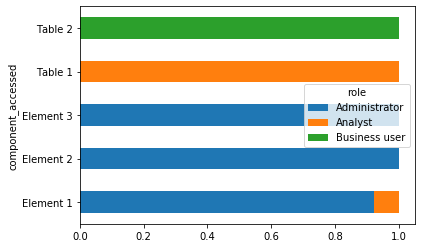

In [62]:
bycomp_false.unstack().plot(kind='barh',stacked = True)

In [63]:
#using only true

In [64]:
bycomponent_true = dftrue.groupby('role').component_accessed.value_counts(normalize=True)
bycomponent_true.unstack()

component_accessed,Element 1,Element 2,Element 3,Table 1
role,,,,
Analyst,NaN,0.75,0.25,NaN
Business user,0.6,NaN,NaN,0.4


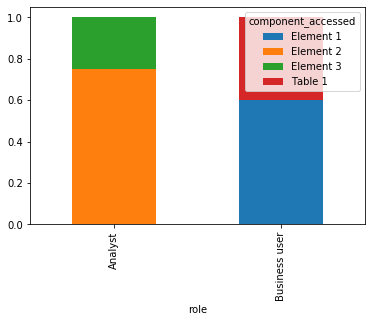

In [65]:
bycomponent_true.unstack().plot(kind='bar',stacked = True)

In [66]:
#using only false

In [67]:
bycomponent_false = dffalse.groupby('role').component_accessed.value_counts(normalize=True)
bycomponent_false.unstack()

component_accessed,Element 1,Element 2,Element 3,Table 1,Table 2
role,,,,,
Administrator,0.800000,0.133333,0.066667,NaN,NaN
Analyst,0.015385,NaN,NaN,0.984615,NaN
Business user,NaN,NaN,NaN,NaN,1.0


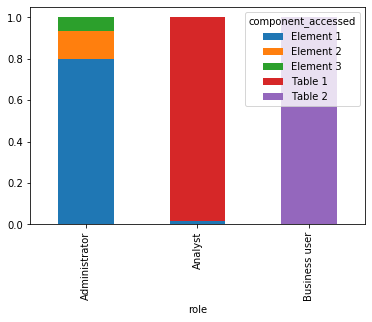

In [68]:
bycomponent_false.unstack().plot(kind='bar',stacked = True)

# grouping by alarm

In [69]:
byalarm_true = dftrue.groupby('alarm').component_accessed.value_counts(normalize=True)
byalarm_true.unstack()

component_accessed,Element 1,Element 2,Element 3,Table 1
alarm,,,,
True,0.428571,0.214286,0.071429,0.285714


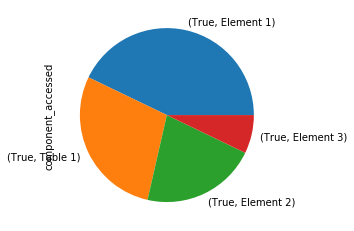

In [70]:
byalarm_true.plot(kind='pie')

In [71]:
byalarm_false = dffalse.groupby('alarm').component_accessed.value_counts(normalize=True)
byalarm_false.unstack()

component_accessed,Element 1,Element 2,Element 3,Table 1,Table 2
alarm,,,,,
False,0.123457,0.018993,0.009497,0.607787,0.240266


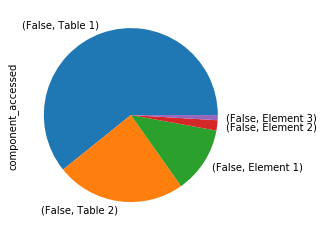

In [72]:
byalarm_false.plot(kind='pie')

from the above charts. we can conclude that the component accessed by an individual user depends on whether he is an analyst, business user and admin

# Analyzing the 'alarm' column

In [73]:
#grouping by req and alarm

In [74]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [75]:
df['role_encoded'] = LE.fit_transform(df['role'])
df['component_accessed_encoded'] = LE.fit_transform(df['component_accessed'])
df['request_type_encoded'] = LE.fit_transform(df['request_type'])
df['violation_type_encoded'] = LE.fit_transform(df['violation_type'])
df['alarm_encoded'] = LE.fit_transform(df['alarm'])

In [76]:
dfcorr = df.drop(['timestamp','requestor','role','component_accessed','request_type','violation_type_encoded','alarm'],axis = 1)

encoded role :-

0 - admin

1 - analyst

2 - business user

component accessed encoded :-

0 - element 1

1 - element 2

2 - element 3

3 - table 1

4 - table 2

request type encoded :-

0 - append

1 - select

violation type encoded :-

0 - no violation

alarm encoded :-

0 - false

1 - true

In [77]:
dfcorr.head()

,violation_type,role_encoded,component_accessed_encoded,request_type_encoded,alarm_encoded
0,No authorization,2,4,1,0
1,No authorization,2,4,1,0
2,No authorization,2,4,1,0
3,No authorization,0,0,1,0
4,No authorization,1,1,1,1


In [78]:
dfcorr.corr()

,role_encoded,component_accessed_encoded,request_type_encoded,alarm_encoded
role_encoded,1.000000,0.572546,0.099013,0.316617
component_accessed_encoded,0.572546,1.000000,-0.082569,-0.397455
request_type_encoded,0.099013,-0.082569,1.000000,0.052028
alarm_encoded,0.316617,-0.397455,0.052028,1.000000


In [79]:
#By alarm

In [80]:
#grouping by all types of alarms and components(true and false)

In [81]:
byalarm_tf = df.groupby('component_accessed').alarm.value_counts(normalize=False)

In [82]:
byalarm100 = df.groupby('component_accessed').alarm.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'

In [83]:
byalarm_tf.unstack()

alarm,False,True
component_accessed,,
Element 1,130.0,60.0
Element 2,20.0,30.0
Element 3,10.0,10.0
Table 1,640.0,40.0
Table 2,253.0,NaN


In [84]:
byalarm100.unstack()

alarm,False,True
component_accessed,,
Element 1,68.4%,31.6%
Element 2,40.0%,60.0%
Element 3,50.0%,50.0%
Table 1,94.1%,5.9%
Table 2,100.0%,NaN


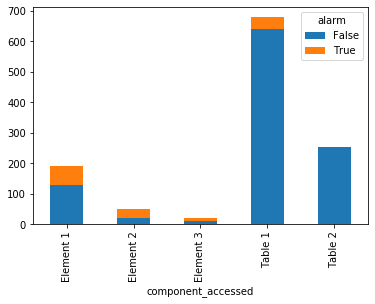

In [85]:
byalarm_tf.unstack().plot(kind='bar', stacked = True)

In [86]:
byalarm_tf = df.groupby('component_accessed').alarm.value_counts(normalize=True)

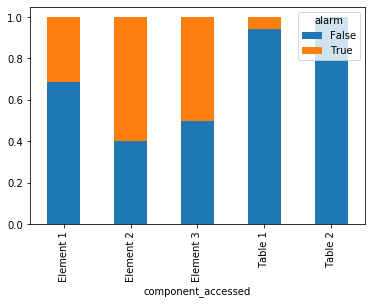

In [87]:
byalarm_tf.unstack().plot(kind='bar', stacked = True)

In [88]:
#using only true

In [89]:
byalarm_true = dftrue.groupby('component_accessed').alarm.value_counts(normalize=True)

In [90]:
byalarm100_true = dftrue.groupby('component_accessed').alarm.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'

In [91]:
byalarm100_true.unstack()

alarm,True
component_accessed,
Element 1,100.0%
Element 2,100.0%
Element 3,100.0%
Table 1,100.0%


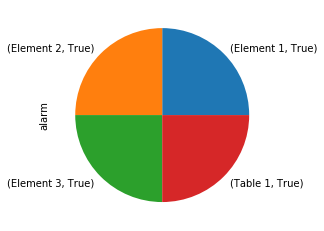

In [92]:
byalarm_true.plot(kind='pie')

In [93]:
#using only false

In [94]:
byalarm_false = dffalse.groupby('component_accessed').alarm.value_counts(normalize=True)

In [95]:
byalarm100_false = dffalse.groupby('component_accessed').alarm.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'

In [96]:
byalarm100_false.unstack()

alarm,False
component_accessed,
Element 1,100.0%
Element 2,100.0%
Element 3,100.0%
Table 1,100.0%
Table 2,100.0%


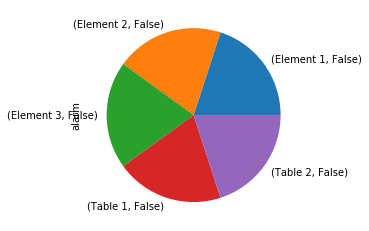

In [97]:
byalarm_false.plot(kind='pie')

In [98]:
#grouping by type of user 

In [99]:
byrole_tf = df.groupby('role').alarm.value_counts(normalize=False)

In [100]:
byrole_tf.unstack()

alarm,False,True
role,,
Administrator,150.0,NaN
Analyst,650.0,40.0
Business user,253.0,100.0


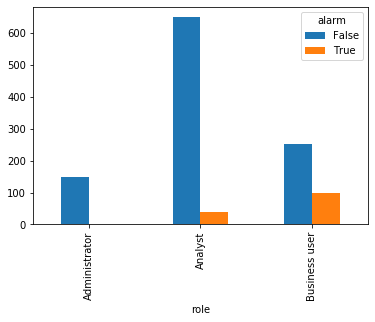

In [101]:
byrole_tf.unstack().plot(kind='bar',stacked=False)

In [102]:
#grouping by true only 

In [103]:
byrole_true = dftrue.groupby('role').alarm.value_counts(normalize=False)

In [104]:
byrole_true.unstack()

alarm,True
role,
Analyst,40
Business user,100


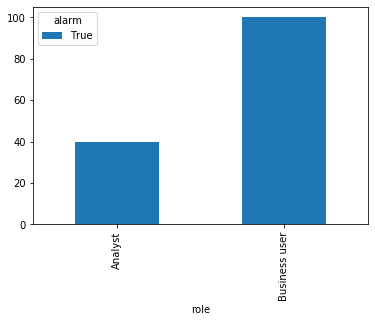

In [105]:
byrole_true.unstack().plot(kind='bar',stacked = False)

In [106]:
#grouping by False only

In [107]:
byrole_false = dffalse.groupby('role').alarm.value_counts(normalize=False)

In [108]:
byrole_false.unstack()

alarm,False
role,
Administrator,150
Analyst,650
Business user,253


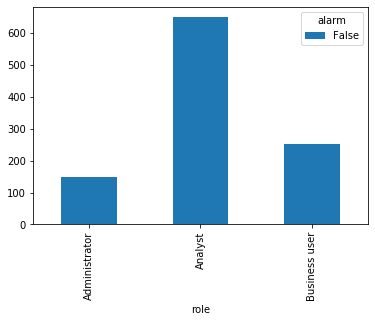

In [109]:
byrole_false.unstack().plot(kind='bar',stacked = False)

In [110]:
#grouping by request types

In [111]:
byrole_t = dffalse.groupby('role').alarm.value_counts(normalize=False)

In [112]:
byrole_t.unstack()

alarm,False
role,
Administrator,150
Analyst,650
Business user,253


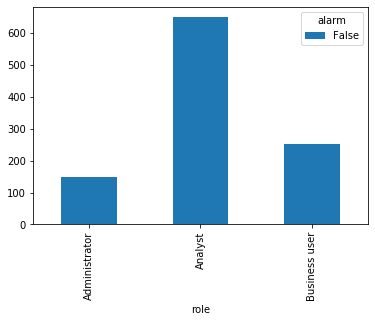

In [113]:
byrole_t.unstack().plot(kind='bar',stacked = False)

In [114]:
byrole_f = dftrue.groupby('role').alarm.value_counts(normalize = False)

In [115]:
byrole_f.unstack()

alarm,True
role,
Analyst,40
Business user,100


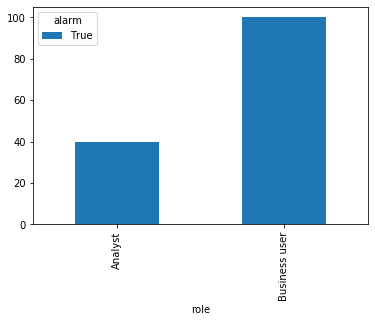

In [116]:
byrole_f.unstack().plot(kind='bar')

In [117]:
df.describe()

,role_encoded,component_accessed_encoded,request_type_encoded,violation_type_encoded,alarm_encoded
count,1193.000000,1193.000000,1193.000000,1193.0,1193.000000
mean,1.170159,2.633697,0.882649,0.0,0.117351
std,0.626898,1.302722,0.321973,0.0,0.321973
min,0.000000,0.000000,0.000000,0.0,0.000000
25%,1.000000,3.000000,1.000000,0.0,0.000000
50%,1.000000,3.000000,1.000000,0.0,0.000000
75%,2.000000,3.000000,1.000000,0.0,0.000000
max,2.000000,4.000000,1.000000,0.0,1.000000


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193 entries, 0 to 1192
Data columns (total 12 columns):
timestamp                     1193 non-null datetime64[ns]
requestor                     1193 non-null object
role                          1193 non-null object
component_accessed            1193 non-null object
request_type                  1193 non-null object
violation_type                1193 non-null object
alarm                         1193 non-null bool
role_encoded                  1193 non-null int32
component_accessed_encoded    1193 non-null int32
request_type_encoded          1193 non-null int32
violation_type_encoded        1193 non-null int32
alarm_encoded                 1193 non-null int64
dtypes: bool(1), datetime64[ns](1), int32(4), int64(1), object(5)
memory usage: 85.1+ KB


In [119]:
reqcomp = df.groupby('component_accessed').request_type.value_counts(normalize = False)

In [120]:
reqcomp.unstack()

request_type,Append,Select
component_accessed,,
Element 1,NaN,190.0
Element 2,NaN,50.0
Element 3,10.0,10.0
Table 1,130.0,550.0
Table 2,NaN,253.0


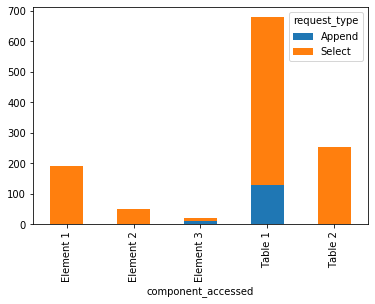

In [121]:
reqcomp.unstack().plot(kind='bar', stacked = True)

In [122]:
reqcomp = df.groupby('component_accessed').request_type.value_counts(normalize = True)

In [123]:
reqcomp.unstack()

request_type,Append,Select
component_accessed,,
Element 1,NaN,1.000000
Element 2,NaN,1.000000
Element 3,0.500000,0.500000
Table 1,0.191176,0.808824
Table 2,NaN,1.000000


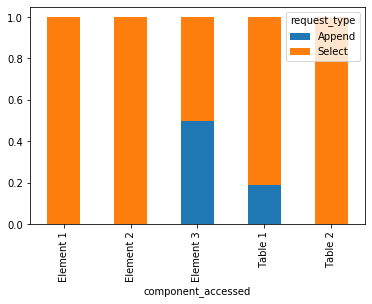

In [124]:
reqcomp.unstack().plot(kind = 'bar', stacked = True)

In [125]:
vioala = df.groupby('violation_type').alarm.value_counts(normalize = False)

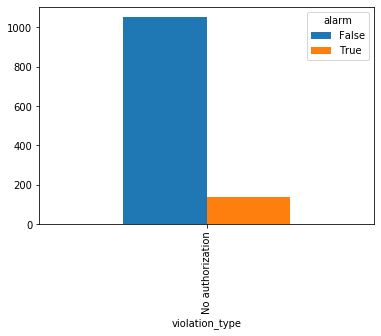

In [126]:
vioala.unstack().plot(kind='bar', stacked = False)

In [127]:
vioala.unstack()

alarm,False,True
violation_type,,
No authorization,1053,140


In [128]:
#time = df.groupby('alarm').timestamp.value_counts(normalize=False)

In [129]:
#time.unstack()

In [166]:
df1 = alarm = pd.read_excel ('C:\\Users\\abhishekshenoy\\Downloads\\Alarms file for EDA phase 2020 (1).xlsx')
df1 = df1.drop(['Timestamp','Violation type'],axis =1)
df1.columns

Index(['Requestor', 'Role', 'Component Accessed', 'Request type', 'Alarm'], dtype='object')

In [167]:
dummy1 = pd.get_dummies(df1['Role'])
dummy2 = pd.get_dummies(df1['Requestor'])
dummy3 = pd.get_dummies(df1['Component Accessed'])
dummy4 = pd.get_dummies(df1['Request type'])

In [168]:
df1 = pd.concat([df1,dummy1,dummy2,dummy3,dummy4],axis = 1)

In [170]:
df1.head()
df1.columns

Index(['Requestor', 'Role', 'Component Accessed', 'Request type', 'Alarm',
       'Administrator', 'Analyst', 'Business user', 'User A', 'User B',
       'User C', 'Element 1', 'Element 2', 'Element 3', 'Table 1', 'Table 2',
       'Append', 'Select'],
      dtype='object')

In [171]:
df1 = df1.drop(['Requestor', 'Role', 'Component Accessed', 'Request type'], axis = 1)

In [173]:
x = df1.drop('Alarm',axis = 1)

In [175]:
y = df1.drop(['Administrator', 'Analyst', 'Business user', 'User A', 'User B',
       'User C', 'Element 1', 'Element 2', 'Element 3', 'Table 1', 'Table 2',
       'Append', 'Select'],axis = 1)

In [213]:
model_dt = tree.DecisionTreeClassifier(criterion = 'gini', splitter = 'random',max_leaf_nodes = 5, min_samples_leaf = 5, max_depth = 2)

In [214]:
model_dt.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [215]:
df2 = pd.read_excel('C:\\Users\\abhishekshenoy\\Downloads\\Alarms file for Final Phase - unscored.xlsx') 

In [216]:
dummy1 = pd.get_dummies(df2['Role'])
dummy2 = pd.get_dummies(df2['Requestor'])
dummy3 = pd.get_dummies(df2['Component Accessed'])
dummy4 = pd.get_dummies(df2['Request type'])

In [217]:
df2 = df2.drop(['Requestor', 'Role', 'Component Accessed', 'Request type'], axis = 1)

In [218]:
df2.head()

,Timestamp,Violation type
0,2016-11-08 06:15:00,No authorization
1,2016-11-08 06:29:24,No authorization
2,2016-11-08 06:43:48,No authorization
3,2016-11-08 06:58:12,No authorization
4,2019-11-27 23:31:00,No authorization


In [219]:
df2 = pd.concat([df2,dummy1,dummy2,dummy3,dummy4],axis = 1)

In [220]:
df2.head()
df2.columns

Index(['Timestamp', 'Violation type', 'Administrator', 'Analyst',
       'Business user', 'User A', 'User B', 'User C', 'Element 1', 'Element 2',
       'Element 3', 'Table 1', 'Table 2', 'Append', 'Select'],
      dtype='object')

In [221]:
df2 = df2.drop(['Timestamp','Violation type'], axis = 1)

In [222]:
df2.head(10)

,Administrator,Analyst,Business user,User A,User B,User C,Element 1,Element 2,Element 3,Table 1,Table 2,Append,Select
0,0,0,1,0,1,0,0,0,0,0,1,0,1
1,0,0,1,0,1,0,0,0,0,0,1,0,1
2,0,0,1,0,1,0,0,0,0,0,1,0,1
3,1,0,0,0,0,1,1,0,0,0,0,1,0
4,0,1,0,1,0,0,0,1,0,0,0,0,1
5,0,1,0,1,0,0,0,1,0,0,0,0,1
6,0,1,0,1,0,0,0,1,0,0,0,0,1
7,0,1,0,1,0,0,0,0,1,0,0,1,0
8,0,1,0,1,0,0,0,0,1,0,0,1,0
9,0,1,0,1,0,0,0,0,1,0,0,1,0


In [223]:
model_dt.predict(df2)

array([False, False, False, ...,  True, False,  True])

In [224]:
df3 = pd.read_excel('C:\\Users\\abhishekshenoy\\Downloads\\Alarms file for Final Phase - unscored.xlsx') 

In [225]:
df3['alarm'] = model_dt.predict(df2)

In [226]:
df3['alarm'].value_counts()

False    3131
True      333
Name: alarm, dtype: int64

In [227]:
conf = [0.84642,0.23672,0.86143,0.76327,0.75144,0.85161,0.73903,0.65588,0.73903,0.84642,0.67609,0.75144,0.73903]
np.mean(conf)

0.7275238461538461

In [228]:
confidence_level(df3)

0.7275238461538461